In [1]:
from sklearn import tree
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import re
from nltk.stem import WordNetLemmatizer

#for Coin value
from pycoingecko import CoinGeckoAPI
import json
from pandas import json_normalize
cg = CoinGeckoAPI()
gecko_list = [
    "bitcoin",
    "ethereum",
    "dogecoin"
]

In [2]:
doge = pd.read_csv(os.path.join("data", "doge.csv"))
doge = doge.rename(columns={"Datetime":"date"})
doge['date'] = pd.to_datetime(doge['date'])
doge['date'] = doge['date'].dt.strftime('%Y-%m-%d')
doge

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp
0,0,2022-05-01,"['btc', 'eth', 'doge', 'en', 'best', 'discord'...",0.078,0.578,0.344,0.8481
1,1,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'jamie...",0.000,1.000,0.000,0.0000
2,2,2022-05-01,"['1', 'eth', '1429', 'tweet', '2', 'btc', '103...",0.000,1.000,0.000,0.0000
3,3,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'carpe...",0.000,1.000,0.000,0.0000
4,4,2022-05-01,"['264', '600', '000', '000', 'x', '7', '55', '...",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...
34403,34403,2022-05-14,"['price', 'updat', 'usd', 'last', '1', 'hour',...",0.000,1.000,0.000,0.0000
34404,34404,2022-05-14,"['btc', '29240', '80', 'usd', 'eth', '2006', '...",0.000,1.000,0.000,0.0000
34405,34405,2022-05-14,"['btc', 'price', '29', '311', 'eth', 'price', ...",0.000,1.000,0.000,0.0000
34406,34406,2022-05-14,"['compra', 'babydog', 'otra', 'memecoin', 'en'...",0.000,1.000,0.000,0.0000


In [3]:
doge_neg = doge[doge['negative'] > 0.2]
doge_pos = doge[doge['positive'] > 0.2]

In [4]:
doge_pos

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp
0,0,2022-05-01,"['btc', 'eth', 'doge', 'en', 'best', 'discord'...",0.078,0.578,0.344,0.8481
14,14,2022-05-01,"['elonmusk', 'billym2k', 'dogecoin', 'part', '...",0.000,0.750,0.250,0.2500
25,25,2022-05-01,"['gate', 'io', 'ye', 'good', 'result', 'doge']",0.000,0.633,0.367,0.4404
35,35,2022-05-01,"['dogememegirl', 'dogecoin', 'know', 'also', '...",0.000,0.690,0.310,0.4019
37,37,2022-05-01,"['next', 'kiba', 'mri', 'doge', 'arriv', 'kind...",0.000,0.790,0.210,0.7269
...,...,...,...,...,...,...,...
34379,34379,2022-05-14,"['mattwallace888', 'well', 'guess', 'go', 'go'...",0.000,0.638,0.362,0.6249
34385,34385,2022-05-14,"['craigblancett', 'elonmusk', 'dogeaccept', 'd...",0.000,0.568,0.432,0.5859
34387,34387,2022-05-14,"['love', 'dogecoin', 'trust', 'doge', 'almost'...",0.000,0.487,0.513,0.9124
34391,34391,2022-05-14,"['think', 'doge', 'elonmusk', 'fill', 'well', ...",0.000,0.656,0.344,0.2732


In [5]:
print(len(doge_neg))
print(len(doge_pos))

1447
5154


In [6]:
positive = doge_pos['cleaned']

from matplotlib import pyplot as plt
from wordcloud import WordCloud 

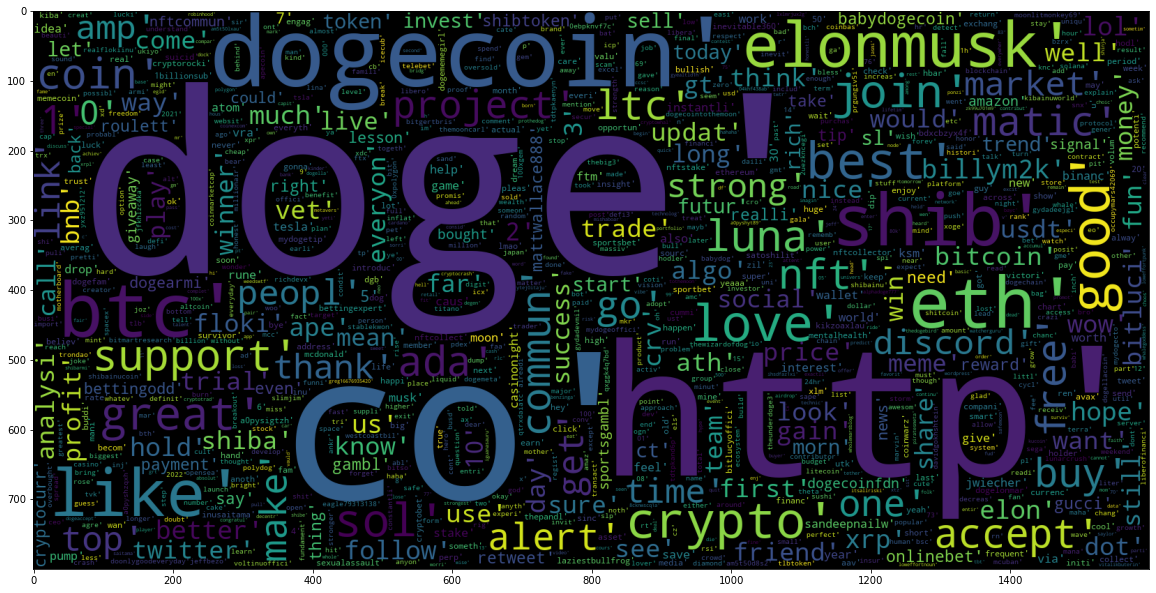

In [7]:
positive = doge_pos['cleaned']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive))
plt.imshow(wc)

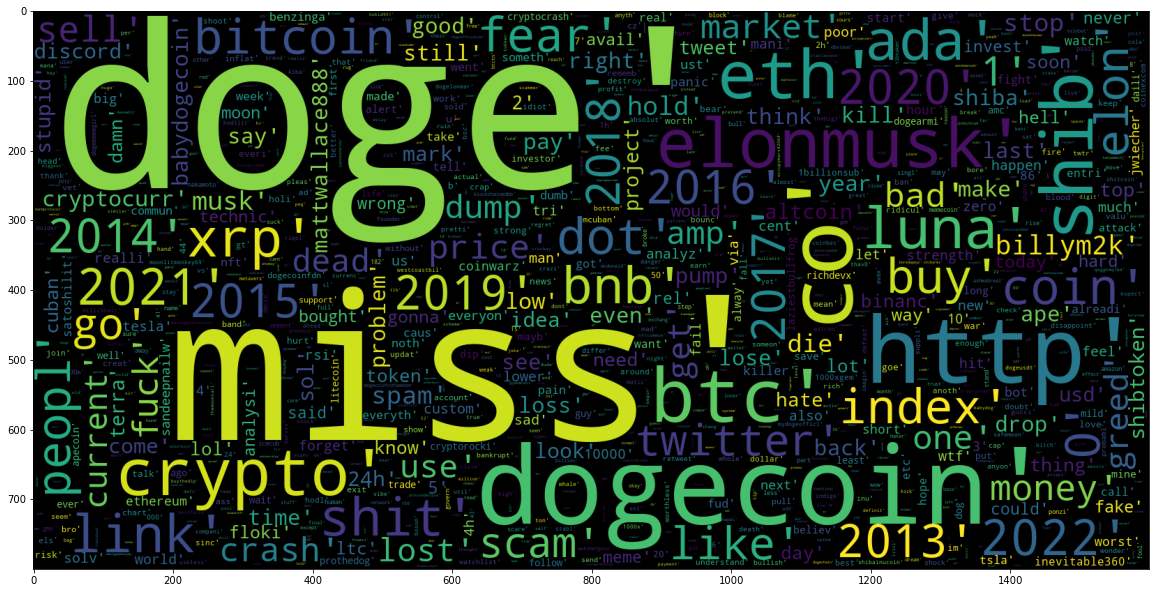

In [8]:
negative = doge_neg['cleaned']
plt.figure(figsize = (20,20))
wc2 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative))
plt.imshow(wc2)

In [9]:
##asigning value to positive, negative and neutral, negative(0), neutral(1), positive(2)
sentiment0=[]
for i in range(len(doge)):
    if doge.loc[i,'negative']>0:
        sentiment0+=[0]
    elif doge.loc[i,'positive']>0:
        sentiment0+=[2]        
    else:
        sentiment0+=[1]     

In [10]:
doge['sentiment']=sentiment0
doge['sentiment'].value_counts()

doge.head()

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp,sentiment
0,0,2022-05-01,"['btc', 'eth', 'doge', 'en', 'best', 'discord'...",0.078,0.578,0.344,0.8481,0
1,1,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'jamie...",0.000,1.000,0.000,0.0000,1
2,2,2022-05-01,"['1', 'eth', '1429', 'tweet', '2', 'btc', '103...",0.000,1.000,0.000,0.0000,1
3,3,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'carpe...",0.000,1.000,0.000,0.0000,1
4,4,2022-05-01,"['264', '600', '000', '000', 'x', '7', '55', '...",0.000,1.000,0.000,0.0000,1


In [11]:
target = doge["cleaned"]
target_names = doge[["sentiment"]]

# This section is to extract the value of Ethereum (plus Dodge and Bitcoin)

In [12]:
cg = CoinGeckoAPI()

data = {}
for coin in gecko_list:
    try:
        nested_lists = cg.get_coin_market_chart_range_by_id(
            id=coin,vs_currency='aud',from_timestamp='1589807389',to_timestamp='1652879389'
        )["prices"]
        data[coin] = {}
        data[coin]["timestamps"], data[coin]["values"], = zip(*nested_lists)

    except Exception as e:
        print(e)
        print("coin: " + coin)

frame_list = [
    pd.DataFrame(data[coin]["values"],data[coin]["timestamps"], columns=[coin])
    for coin in gecko_list
    if coin in data
]

In [13]:
df_cryptocurrency = pd.concat(frame_list, axis=1)

In [14]:
df_cryptocurrency["datetime"] = pd.to_datetime(df_cryptocurrency.index, unit="ms")
df_cryptocurrency["date"] = df_cryptocurrency["datetime"].dt.date
df_cryptocurrency["hour"] = df_cryptocurrency["datetime"].dt.hour
df_cryptocurrency.dropna(inplace=True)

In [15]:
renamed= df_cryptocurrency.rename(columns={'bitcoin': 'bitcoin_price','ethereum': 'ethereum_price','dogecoin':'dogecoin_price','date': 'date'})

In [16]:
crypto = renamed.drop(['datetime', 'hour'], axis = 1)

In [17]:
crypto.reset_index(inplace=True)
crypto = crypto.drop(['index'], axis = 1)
crypto['date'] = pd.to_datetime(crypto['date'])
crypto['date'] = crypto['date'].dt.strftime('%Y-%m-%d')
crypto

,bitcoin_price,ethereum_price,dogecoin_price,date
0,14884.979992,328.653136,0.003901,2020-05-19
1,14922.865925,326.538524,0.003891,2020-05-20
2,14452.798040,318.473767,0.003781,2020-05-21
3,13795.940128,302.899061,0.003681,2020-05-22
4,13971.494350,315.525952,0.003858,2020-05-23
...,...,...,...,...
725,42267.741872,2898.843244,0.127568,2022-05-14
726,43534.739233,2976.736395,0.129823,2022-05-15
727,45069.769903,3089.689306,0.134079,2022-05-16
728,42910.751665,2905.144652,0.126187,2022-05-17


In [18]:
crypto['Change DOGE'] = crypto.dogecoin_price - crypto.dogecoin_price.shift(1)
crypto

,bitcoin_price,ethereum_price,dogecoin_price,date,Change DOGE
0,14884.979992,328.653136,0.003901,2020-05-19,NaN
1,14922.865925,326.538524,0.003891,2020-05-20,-0.000009
2,14452.798040,318.473767,0.003781,2020-05-21,-0.000111
3,13795.940128,302.899061,0.003681,2020-05-22,-0.000099
4,13971.494350,315.525952,0.003858,2020-05-23,0.000176
...,...,...,...,...,...
725,42267.741872,2898.843244,0.127568,2022-05-14,0.006748
726,43534.739233,2976.736395,0.129823,2022-05-15,0.002255
727,45069.769903,3089.689306,0.134079,2022-05-16,0.004257
728,42910.751665,2905.144652,0.126187,2022-05-17,-0.007892


In [19]:
crypto['Doge Up/Down'] = np.where(crypto['Change DOGE']>0, 1, 0)
crypto

,bitcoin_price,ethereum_price,dogecoin_price,date,Change DOGE,Doge Up/Down
0,14884.979992,328.653136,0.003901,2020-05-19,NaN,0
1,14922.865925,326.538524,0.003891,2020-05-20,-0.000009,0
2,14452.798040,318.473767,0.003781,2020-05-21,-0.000111,0
3,13795.940128,302.899061,0.003681,2020-05-22,-0.000099,0
4,13971.494350,315.525952,0.003858,2020-05-23,0.000176,1
...,...,...,...,...,...,...
725,42267.741872,2898.843244,0.127568,2022-05-14,0.006748,1
726,43534.739233,2976.736395,0.129823,2022-05-15,0.002255,1
727,45069.769903,3089.689306,0.134079,2022-05-16,0.004257,1
728,42910.751665,2905.144652,0.126187,2022-05-17,-0.007892,0


# Calculate the where the average sentiment overall per day was positive or negative and combine with the ETH table on price going up/down

In [20]:
doge_sentiment = doge.groupby('date')['sentiment'].mean()
doge_sentiment = doge_sentiment.reset_index()
doge_sentiment

,date,sentiment
0,2022-05-01,1.183859
1,2022-05-02,1.180728
2,2022-05-03,1.198509
3,2022-05-04,1.195354
4,2022-05-05,1.198593
5,2022-05-06,1.212926
6,2022-05-07,1.248668
7,2022-05-08,1.221366
8,2022-05-09,1.165517
9,2022-05-10,1.170865


In [21]:
doge_sentiment['sentiment'] = np.where(doge_sentiment['sentiment']>0, 1, 0)

In [22]:
doge_sentiment_move = pd.merge(doge_sentiment, crypto,how='outer', on='date')

# Sentiment Analysis - Starts Here

In [23]:
doge1 = doge.drop(columns=["Unnamed: 0"], axis = 1)
doge1

,date,cleaned,negative,neutral,positive,comp,sentiment
0,2022-05-01,"['btc', 'eth', 'doge', 'en', 'best', 'discord'...",0.078,0.578,0.344,0.8481,0
1,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'jamie...",0.000,1.000,0.000,0.0000,1
2,2022-05-01,"['1', 'eth', '1429', 'tweet', '2', 'btc', '103...",0.000,1.000,0.000,0.0000,1
3,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'carpe...",0.000,1.000,0.000,0.0000,1
4,2022-05-01,"['264', '600', '000', '000', 'x', '7', '55', '...",0.000,1.000,0.000,0.0000,1
...,...,...,...,...,...,...,...
34403,2022-05-14,"['price', 'updat', 'usd', 'last', '1', 'hour',...",0.000,1.000,0.000,0.0000,1
34404,2022-05-14,"['btc', '29240', '80', 'usd', 'eth', '2006', '...",0.000,1.000,0.000,0.0000,1
34405,2022-05-14,"['btc', 'price', '29', '311', 'eth', 'price', ...",0.000,1.000,0.000,0.0000,1
34406,2022-05-14,"['compra', 'babydog', 'otra', 'memecoin', 'en'...",0.000,1.000,0.000,0.0000,1


In [24]:
doge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34408 entries, 0 to 34407
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       34408 non-null  object 
 1   cleaned    34408 non-null  object 
 2   negative   34408 non-null  float64
 3   neutral    34408 non-null  float64
 4   positive   34408 non-null  float64
 5   comp       34408 non-null  float64
 6   sentiment  34408 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [25]:
doge1.dtypes

date          object
cleaned       object
negative     float64
neutral      float64
positive     float64
comp         float64
sentiment      int64
dtype: object

In [26]:
np.sum(doge1.isnull().any(axis=1))

0

In [27]:
print('Count of columns in the data is: ', len(doge1.columns))
print('Count of rows in the data is: ', len(doge1))

Count of columns in the data is:  7
Count of rows in the data is:  34408


In [28]:
doge1['sentiment'].unique()

array([0, 1, 2], dtype=int64)

In [29]:
doge1['sentiment'].nunique()

3

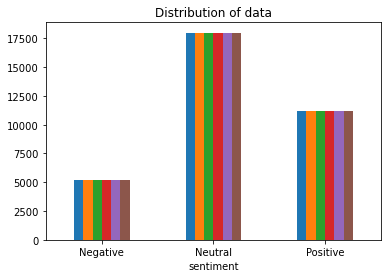

In [49]:
# Plotting the distribution for dataset.
ax = doge1.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(doge1['cleaned']), list(doge1['sentiment'])
plt.savefig("images/doge_sent_dist.png")

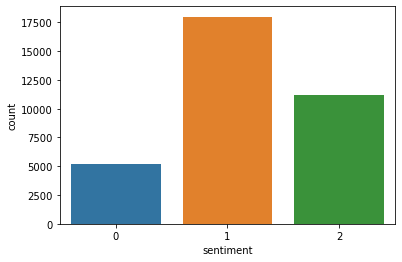

In [50]:
import seaborn as sns
sns.countplot(x='sentiment', data=doge1)
plt.savefig("images/doge_sent_dist2.png")

In [32]:
data = doge1[['cleaned', 'sentiment']]
data

,cleaned,sentiment
0,"['btc', 'eth', 'doge', 'en', 'best', 'discord'...",0
1,"['selenaroyf', 'polydog', 'metapetzai', 'jamie...",1
2,"['1', 'eth', '1429', 'tweet', '2', 'btc', '103...",1
3,"['selenaroyf', 'polydog', 'metapetzai', 'carpe...",1
4,"['264', '600', '000', '000', 'x', '7', '55', '...",1
...,...,...
34403,"['price', 'updat', 'usd', 'last', '1', 'hour',...",1
34404,"['btc', '29240', '80', 'usd', 'eth', '2006', '...",1
34405,"['btc', 'price', '29', '311', 'eth', 'price', ...",1
34406,"['compra', 'babydog', 'otra', 'memecoin', 'en'...",1


In [33]:
data['sentiment'].unique()

array([0, 1, 2], dtype=int64)

In [34]:
#Separating the postivie and negative tweets
data_pos = data[data['sentiment'] == 2]
data_neg = data[data['sentiment'] == 0]

In [35]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [36]:
dataset = pd.concat([data_pos, data_neg])
dataset

,cleaned,sentiment
13,"['support', 'us', 'patreon', 'http', 'co', 'ft...",2
14,"['elonmusk', 'billym2k', 'dogecoin', 'part', '...",2
17,"['38', '335', '200', 'worth', 'doge', 'sent', ...",2
21,"['current', 'price', 'one', 'doge', '0', '1332...",2
22,"['unofficialterri', 'okaydog', 'elonmusk', 'do...",2
...,...,...
34366,"['titanium50', 'marketrebel', 'safest', 'stabl...",0
34376,"['pig', 'bodin', 'romanaalfredo', 'lui93644865...",0
34383,"['fulli', 'expect', 'btc', 'eth', 'sol', 'hit'...",0
34393,"['elonmusk', 'twitter', 'billym2k', 'dogecoin'...",0


In [37]:
dataset['cleaned']=dataset['cleaned'].str.lower()
dataset['cleaned'].tail()

34366    ['titanium50', 'marketrebel', 'safest', 'stabl...
34376    ['pig', 'bodin', 'romanaalfredo', 'lui93644865...
34383    ['fulli', 'expect', 'btc', 'eth', 'sol', 'hit'...
34393    ['elonmusk', 'twitter', 'billym2k', 'dogecoin'...
34402    ['buy', 'dogecoin', 'doge', '5', '68', 'sinc',...
Name: cleaned, dtype: object

In [38]:
##Cleaning and removing STOPWORDS

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [39]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['cleaned'] = dataset['cleaned'].apply(lambda text: cleaning_stopwords(text))
dataset['cleaned'].head()

13    ['support', 'us', 'patreon', 'http', 'co', 'ft...
14    ['elonmusk', 'billym2k', 'dogecoin', 'part', '...
17    ['38', '335', '200', 'worth', 'doge', 'sent', ...
21    ['current', 'price', 'one', 'doge', '0', '1332...
22    ['unofficialterri', 'okaydog', 'elonmusk', 'do...
Name: cleaned, dtype: object

In [40]:
#Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['cleaned']= dataset['cleaned'].apply(lambda x: cleaning_punctuations(x))
dataset['cleaned'].tail()

34366    titanium50 marketrebel safest stabl coin get s...
34376    pig bodin romanaalfredo lui93644865 zguz god p...
34383    fulli expect btc eth sol hit low bounc may 1st...
34393    elonmusk twitter billym2k dogecoin john inuboo...
34402    buy dogecoin doge 5 68 sinc last signal pair d...
Name: cleaned, dtype: object

In [41]:
#Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_repeating_char(x))
dataset['cleaned'].tail()

34366    titanium50 marketrebel safest stabl coin get s...
34376    pig bodin romanaalfredo lui93644865 zguz god p...
34383    fulli expect btc eth sol hit low bounc may1st ...
34393    elonmusk twitter billym2k dogecoin john inuboo...
34402    buy dogecoin doge 5 68 sinc last signal pair d...
Name: cleaned, dtype: object

In [42]:
#Cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_URLs(x))
dataset['cleaned'].tail()

34366    titanium50 marketrebel safest stabl coin get s...
34376    pig bodin romanaalfredo lui93644865 zguz god p...
34383    fulli expect btc eth sol hit low bounc may1st ...
34393    elonmusk twitter billym2k dogecoin john inuboo...
34402    buy dogecoin doge 5 68 sinc last signal pair d...
Name: cleaned, dtype: object

In [43]:
#Cleaning numbers out
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_numbers(x))
dataset['cleaned'].tail()

34366    titanium marketrebel safest stabl coin get shi...
34376    pig bodin romanaalfredo lui zguz god pain tri ...
34383    fulli expect btc eth sol hit low bounc mayst l...
34393    elonmusk twitter billymk dogecoin john inubook...
34402    buy dogecoin doge   sinc last signal pair doge...
Name: cleaned, dtype: object

In [44]:
#appllying stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['cleaned']= dataset['cleaned'].apply(lambda x: stemming_on_text(x))
dataset['cleaned'].head()

13    support us patreon http co ftiseylm eth btc ad...
14    elonmusk billymk dogecoin part vision futur tw...
17       worth doge sent largest singl transact past...
21    current price one doge  chang last hour one md...
22    unofficialterri okaydog elonmusk dogecoin magi...
Name: cleaned, dtype: object

In [45]:
#applying lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: lemmatizer_on_text(x))
dataset['cleaned'].head()

13    support us patreon http co ftiseylm eth btc ad...
14    elonmusk billymk dogecoin part vision futur tw...
17       worth doge sent largest singl transact past...
21    current price one doge  chang last hour one md...
22    unofficialterri okaydog elonmusk dogecoin magi...
Name: cleaned, dtype: object

In [46]:
X=dataset.cleaned
y=dataset.sentiment

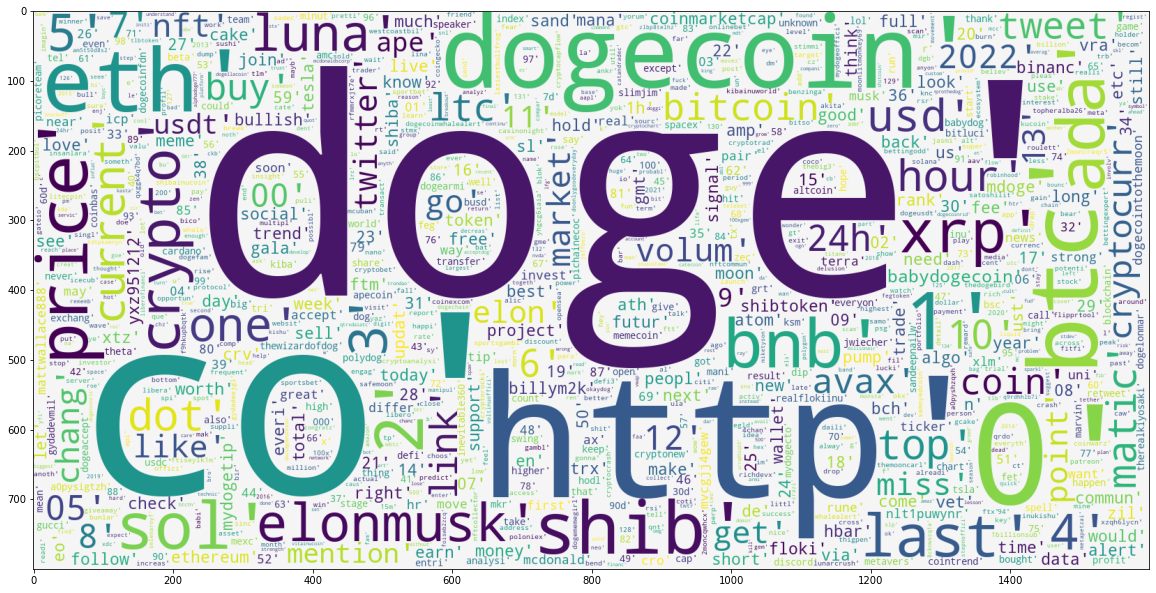

In [47]:
data_pos = data['cleaned'][:800000]
plt.figure(figsize = (20,20))
wc2 = WordCloud(max_words = 1000 , background_color='whitesmoke',width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc2)
plt.savefig("images/doge_pos_word.png")

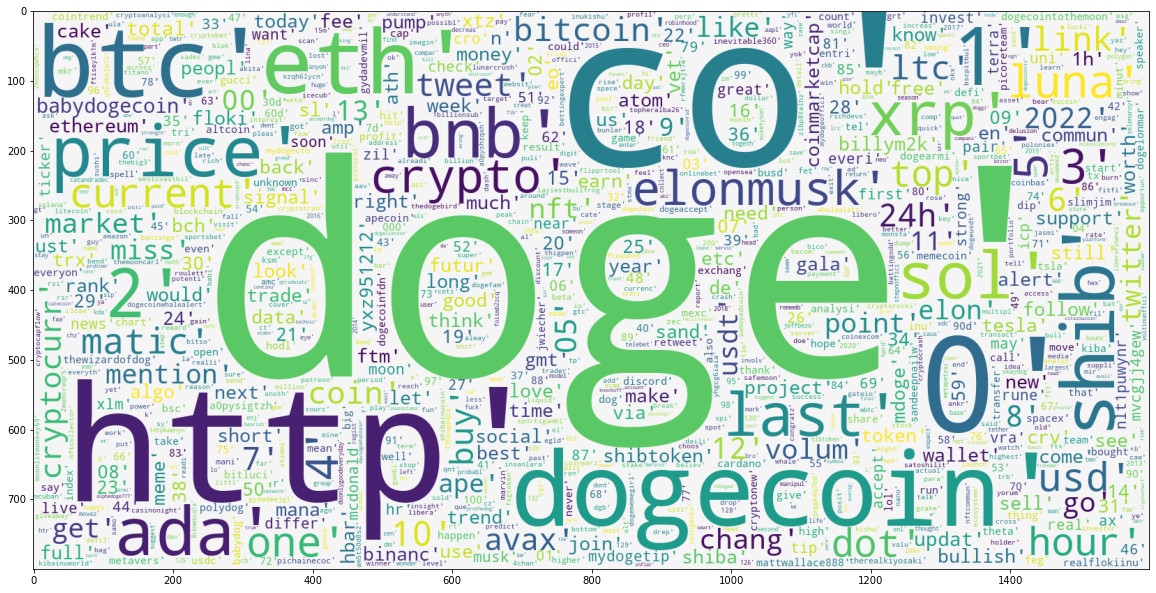

In [48]:
data_neg = data['cleaned'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False, background_color = "whitesmoke").generate(" ".join(data_neg))
plt.imshow(wc)
plt.savefig("images/doge_neg_word.png")

In [51]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(target, target_names,test_size = 0.05, random_state = 42)

In [52]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=600000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  244644


In [53]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [54]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    sentiment = ['Negative','Neutral', 'Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, cmap = 'Blues', annot=True, fmt='d',
                xticklabels = sentiment, yticklabels = sentiment)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.97      0.25      0.40       260
           1       0.74      0.98      0.84       884
           2       0.84      0.70      0.76       577

    accuracy                           0.78      1721
   macro avg       0.85      0.64      0.67      1721
weighted avg       0.81      0.78      0.75      1721



C:\Users\Dion\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


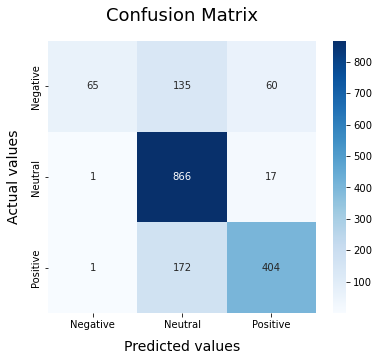

In [55]:
BNBmodel = BernoulliNB()
plt.figure(figsize = (6,5))
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
plt.savefig("images/doge_confusion.png")

# Sentiment vs Crypto Price analysis start here

In [56]:
doge1

,date,cleaned,negative,neutral,positive,comp,sentiment
0,2022-05-01,"['btc', 'eth', 'doge', 'en', 'best', 'discord'...",0.078,0.578,0.344,0.8481,0
1,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'jamie...",0.000,1.000,0.000,0.0000,1
2,2022-05-01,"['1', 'eth', '1429', 'tweet', '2', 'btc', '103...",0.000,1.000,0.000,0.0000,1
3,2022-05-01,"['selenaroyf', 'polydog', 'metapetzai', 'carpe...",0.000,1.000,0.000,0.0000,1
4,2022-05-01,"['264', '600', '000', '000', 'x', '7', '55', '...",0.000,1.000,0.000,0.0000,1
...,...,...,...,...,...,...,...
34403,2022-05-14,"['price', 'updat', 'usd', 'last', '1', 'hour',...",0.000,1.000,0.000,0.0000,1
34404,2022-05-14,"['btc', '29240', '80', 'usd', 'eth', '2006', '...",0.000,1.000,0.000,0.0000,1
34405,2022-05-14,"['btc', 'price', '29', '311', 'eth', 'price', ...",0.000,1.000,0.000,0.0000,1
34406,2022-05-14,"['compra', 'babydog', 'otra', 'memecoin', 'en'...",0.000,1.000,0.000,0.0000,1


In [57]:
crypto

,bitcoin_price,ethereum_price,dogecoin_price,date,Change DOGE,Doge Up/Down
0,14884.979992,328.653136,0.003901,2020-05-19,NaN,0
1,14922.865925,326.538524,0.003891,2020-05-20,-0.000009,0
2,14452.798040,318.473767,0.003781,2020-05-21,-0.000111,0
3,13795.940128,302.899061,0.003681,2020-05-22,-0.000099,0
4,13971.494350,315.525952,0.003858,2020-05-23,0.000176,1
...,...,...,...,...,...,...
725,42267.741872,2898.843244,0.127568,2022-05-14,0.006748,1
726,43534.739233,2976.736395,0.129823,2022-05-15,0.002255,1
727,45069.769903,3089.689306,0.134079,2022-05-16,0.004257,1
728,42910.751665,2905.144652,0.126187,2022-05-17,-0.007892,0


In [58]:
doge_sentiment = doge1.groupby('date')['sentiment'].mean()
doge_sentiment = doge_sentiment.reset_index()
doge_sentiment

,date,sentiment
0,2022-05-01,1.183859
1,2022-05-02,1.180728
2,2022-05-03,1.198509
3,2022-05-04,1.195354
4,2022-05-05,1.198593
5,2022-05-06,1.212926
6,2022-05-07,1.248668
7,2022-05-08,1.221366
8,2022-05-09,1.165517
9,2022-05-10,1.170865


In [59]:
doge_price_sen = pd.merge(doge_sentiment, crypto,how='outer', on='date')

In [60]:
doge_clean1 = doge_price_sen.dropna(subset=['sentiment'])

In [61]:
doge_clean1.head()

,date,sentiment,bitcoin_price,ethereum_price,dogecoin_price,Change DOGE,Doge Up/Down
0,2022-05-01,1.183859,53518.018858,3874.650573,0.180779,-0.010366,0
1,2022-05-02,1.180728,54531.860549,4008.085357,0.188247,0.007468,1
2,2022-05-03,1.198509,54709.645087,4059.288782,0.186066,-0.002181,0
3,2022-05-04,1.195354,53180.614016,3921.344785,0.182778,-0.003288,0
4,2022-05-05,1.198593,54702.555595,4053.948028,0.187391,0.004613,1


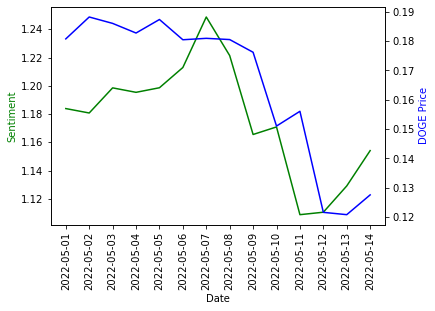

In [62]:
x = doge_clean1["date"]
y1 = doge_clean1["sentiment"]
y2 = doge_clean1["dogecoin_price"]


fig, ax1 = plt.subplots()
plt.xticks(rotation = 90)
ax2 = ax1.twinx()


ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('DOGE Price', color='b')

plt.savefig("images/doge_sentiment_price.png")
plt.show()


In [60]:
doge_pos_avg = doge.groupby('date')['positive'].mean()
doge_pos_avg = doge_pos_avg.reset_index()
doge_pos_avg

,date,positive
0,2022-05-01,0.076760
1,2022-05-02,0.070194
2,2022-05-03,0.075173
3,2022-05-04,0.083141
4,2022-05-05,0.077009
5,2022-05-06,0.080106
6,2022-05-07,0.080135
7,2022-05-08,0.078419
8,2022-05-09,0.079586
9,2022-05-10,0.070076


In [61]:
doge_neg_avg = doge.groupby('date')['negative'].mean()
doge_neg_avg = doge_neg_avg.reset_index()
doge_neg_avg

,date,negative
0,2022-05-01,0.025886
1,2022-05-02,0.022510
2,2022-05-03,0.023598
3,2022-05-04,0.025564
4,2022-05-05,0.022547
5,2022-05-06,0.020917
6,2022-05-07,0.020178
7,2022-05-08,0.022205
8,2022-05-09,0.028681
9,2022-05-10,0.022406


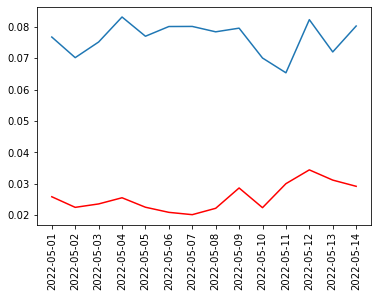

<Figure size 1440x1440 with 0 Axes>

In [67]:
plt.plot(doge_pos_avg['date'],doge_pos_avg["positive"], linestyle = 'solid')
plt.plot(doge_neg_avg['date'],doge_neg_avg["negative"], linestyle = 'solid', color = "red")
plt.xticks(rotation = 90)
plt.figure(figsize = (20,20))
#plt.savefig("test.png")
plt.show()